In [1]:
#import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from functools import reduce

In [2]:
#define function that cleans the dataset

def clean_data(df):
    
    #drop columns with more than 50 empty columns
    
    df.dropna(axis=1,thresh=50, inplace=True)

    #drop the indicator name,code variables as they aren't noisy

    df.drop(["Indicator Name", "Indicator Code"], axis=1,inplace=True)

    #drop rows with more than 12 missing years
    df.dropna(axis=0,thresh=12, inplace=True)

    # fill empty values with 
    df = df.fillna(0)

    return df

In [3]:
#function to left join df with the income/region metadata and separate them into 2 different dfs country and region

# left join the 2 dataframes
def separate_df(data_df, metadata_df):
    
    combined_df= pd.merge(data_df,metadata_df, on='Country Code', how='left')
    
    # seperate countries and regions in 2 different dataframes
    
    country_df = combined_df[combined_df["Region"].notna()]
    region_df = combined_df[combined_df["Region"].isna()]
    
    region_df.drop(["Region", "IncomeGroup"], axis=1, inplace=True)
    
    return country_df, region_df


In [4]:

#define function to create dummies for given column and remove it from df

def create_dummies(df,col_name):
    
    #turn column into dummies
    
    enc = pd.get_dummies( df[col_name])
    
    #join dummies at the end of df
    
    df = pd.concat([df, enc], axis=1)
    
    #drop original column from df
    
    df.drop(col_name,axis=1,inplace=True)
    
    return df
    


In [5]:
#define a function to breakdown the GDP investment df into subcategories

def separate_inv(inv_df, ind, value_i, sub_ind, value_s):

#select indicator to be split
    split_1 = inv_df[inv_df[ind] == value_i]

#select sub-indicator to be split
    split_2 = split_1[split_1[sub_ind] == value_s]

#drop indicator/subindicator columns
    split_2.drop(ind,axis=1,inplace=True)
    split_2.drop(sub_ind,axis=1,inplace=True)

#drop years 2020 and onwards
    split_2.drop(split_2.iloc[:,-9:], axis=1,inplace=True)

    return split_2

In [6]:
def unpivot(df, L, cl_var_name, cl_value_name):
    """
    This function returns unpivoted dataframe. 
    L: list of the static columns name.
    var_name: new name for the new columns of unpivoted columns (first row). 
    value_name: new name for the new columns of unpivoted values (second to last rows).
    """
    
    # Check if first introduced object is a dataframe
    if not isinstance(df, pd.DataFrame):
        print("The first introduced argument should be a dataframe.")
        return None

    # Check if the second introduced object is a list
    if not isinstance(L, list):
        print("The second introduced argument should be a list.")
        return None

    # Check if the third introduced object is a string value
    if not isinstance(cl_var_name, str):
        print("The third introduced argument should be a string value.")
        return None

    # Check if the fourth introduced object is a string value
    if not isinstance(cl_var_name, str):
        print("The fourth introduced argument should be a string value.")
        return None

    # Unpivot dataframe
    unpivoted_df = df.melt(id_vars=L,
                           var_name=cl_var_name,
                           value_name=cl_value_name)
    return unpivoted_df

In [7]:

# import expenditure data from csv and clean data 

receipt_df = pd.read_csv("C:\\Users\Leonor.furtado\\OneDrive - Accenture\\Uni\Programming\project\API_ST.INT.ARVL_DS2_en_csv_v2_103871.csv", skiprows=4)

receipt_df = clean_data(receipt_df)

In [8]:
#import international inbound tourist data from csv and clean the data

tourist_df=pd.read_csv("C:\\Users\Leonor.furtado\OneDrive - Accenture\\Uni\Programming\project\API_ST.INT.ARVL_DS2_en_csv_v2_103871.csv", skiprows=4)

tourist_df = clean_data(tourist_df)

tourist_df.head()

,Country Name,Country Code,1995,1996,1997,1998,1999,2000,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,6.190000e+05,6.410000e+05,6.500000e+05,6.470000e+05,6.830000e+05,7.210000e+05,6.910000e+05,6.430000e+05,...,8.270000e+05,8.130000e+05,8.240000e+05,8.690000e+05,9.040000e+05,9.790000e+05,1.072000e+06,1.225000e+06,1.102000e+06,1.070500e+06
2,Angola,AGO,9.000000e+03,2.100000e+04,4.500000e+04,5.200000e+04,4.500000e+04,5.100000e+04,6.700000e+04,9.100000e+04,...,2.940000e+05,3.660000e+05,4.250000e+05,4.810000e+05,5.280000e+05,6.500000e+05,5.950000e+05,5.920000e+05,3.970000e+05,2.610000e+05
3,Albania,ALB,3.040000e+05,2.870000e+05,1.190000e+05,1.840000e+05,3.710000e+05,3.170000e+05,3.540000e+05,4.700000e+05,...,1.247000e+06,1.711000e+06,2.191000e+06,2.469000e+06,3.156000e+06,2.857000e+06,3.341000e+06,3.784000e+06,4.070000e+06,4.643000e+06
4,Andorra,AND,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.347000e+06,2.949000e+06,3.516000e+06,3.387000e+06,...,2.059000e+06,1.830000e+06,1.808000e+06,2.242000e+06,2.238000e+06,2.328000e+06,2.363000e+06,2.663000e+06,2.831000e+06,0.000000e+00
5,Arab World,ARB,2.115522e+07,2.192905e+07,2.384332e+07,2.623208e+07,3.010843e+07,3.391257e+07,3.478617e+07,3.904145e+07,...,7.456862e+07,7.372749e+07,8.459515e+07,7.090156e+07,7.899196e+07,7.869716e+07,8.415708e+07,7.885381e+07,7.636341e+07,8.221460e+07


In [9]:
startup_df = pd.read_csv("C:\\Users\Leonor.furtado\OneDrive - Accenture\\Uni\Programming\project\Start-up procedures to register a business.csv",skiprows =4)
startup_df = clean_data(startup_df)
startup_df.head()

,Country Name,Country Code,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Afghanistan,AFG,0.000000,4.0000,4.000000,4.000000,5.00,5.00,5.0,5.0,5.00,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
2,Angola,AGO,12.000000,12.0000,12.000000,12.000000,12.00,8.00,8.0,8.0,8.00,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000
3,Albania,ALB,12.000000,12.0000,12.000000,12.000000,11.00,8.00,6.0,6.0,6.00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
5,Arab World,ARB,12.307692,11.6875,11.333333,11.333333,10.45,9.55,9.3,9.4,9.25,9.142857,8.904762,8.714286,8.590909,8.363636,7.863636,7.181818
6,United Arab Emirates,ARE,10.000000,10.0000,10.000000,10.000000,9.00,9.00,8.0,8.0,7.00,6.000000,6.000000,6.000000,6.000000,4.000000,4.000000,2.000000


In [10]:
# import country region and income information
country_info = pd.read_csv("C:\\Users\Leonor.furtado\OneDrive - Accenture\\Uni\Programming\project\Metadata_Country_API_ST.INT.ARVL_DS2_en_csv_v2_103871.csv", usecols=[0,1,2])
country_info.head()

,Country Code,Region,IncomeGroup
0,ABW,Latin America & Caribbean,High income
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Lower middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income


In [11]:
# import GDP and investment information
investment_GDP_df = pd.read_csv("C:\\Users\Leonor.furtado\OneDrive - Accenture\\Uni\Programming\project\Public_Private Spending on travel and Tourism service.csv")

investment_GDP_df.dropna(axis=1,thresh=50, inplace=True)
investment_GDP_df = investment_GDP_df.rename(columns={'Country ISO3': 'Country Code'})
investment_GDP_df.drop(["Indicator Id"], axis=1,inplace=True)

investment_GDP_df.dropna(axis=0,thresh=12, inplace=True)

investment_GDP_df = investment_GDP_df.fillna(0)
investment_GDP_df.head()


,Country Code,Country Name,Indicator,Subindicator Type,1995,1996,1997,1998,1999,2000,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,ABW,Aruba,Government spending on travel and Tourism service,US$ in bn (Real prices),0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000
1,ABW,Aruba,Government spending on travel and Tourism service,% share of total tourism expenditure,17.369100,18.511000,15.714400,14.675300,15.828500,15.914900,...,17.560300,17.651500,17.743200,17.835400,17.928100,18.021200,18.114800,18.208900,18.303500,18.398600
2,ABW,Aruba,Capital investment in Travel and Tourism,US$ in bn (Real prices),0.195498,0.229916,0.330223,0.232969,0.223276,0.153693,...,0.200177,0.204063,0.209092,0.214346,0.221743,0.227012,0.230596,0.232477,0.232387,0.233371
3,ABW,Aruba,Travel and Tourism total contribution to GDP,Percentage share of total GDP,42.500600,61.017300,63.450300,64.002100,59.835100,60.923700,...,86.595400,87.613100,88.640200,89.296400,90.174500,90.179600,90.974500,91.230700,91.013900,91.651200
4,ABW,Aruba,Travel and Tourism total contribution to GDP,US$ in bn (Real prices),0.937878,1.363260,1.528390,1.644470,1.555150,1.654920,...,2.456100,2.524320,2.597360,2.671890,2.749110,2.806970,2.860190,2.894330,2.933290,2.965680


In [12]:

GDP_pct = separate_inv(investment_GDP_df,"Indicator",'Travel and Tourism total contribution to GDP','Subindicator Type','Percentage share of total GDP')

GDP_govt = separate_inv(investment_GDP_df,"Indicator",'Government spending on travel and Tourism service','Subindicator Type',"US$ in bn (Real prices)")

GDP_govt_pct = separate_inv(investment_GDP_df,"Indicator",'Government spending on travel and Tourism service','Subindicator Type',"% share of total tourism expenditure")

GDP_cap = separate_inv(investment_GDP_df,"Indicator",'Capital investment in Travel and Tourism','Subindicator Type',"US$ in bn (Real prices)")

GDP_pct.head()

C:\Users\Leonor.furtado\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Country Code,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3,ABW,Aruba,42.50060,61.01730,63.45030,64.00210,59.83510,60.92370,57.09440,57.09640,...,78.91120,71.98230,81.96960,85.27720,88.78350,88.68340,89.9234,86.51840,85.60000,86.59540
8,AGO,Angola,1.74291,2.08690,1.31310,3.35741,2.68968,1.99362,1.93643,2.76941,...,3.92187,3.27314,3.96158,4.38231,4.28051,4.24098,3.6797,3.80397,3.84565,3.87318
13,ALB,Albania,11.20760,9.17086,10.36500,9.53902,13.33060,17.30970,18.41520,21.18670,...,23.91040,22.98380,24.95270,23.41440,24.77550,24.71080,26.0856,26.16730,26.33710,26.27060
18,ARE,United Arab Emirates,4.58548,4.80991,4.67756,3.92708,4.51956,4.17632,4.12760,4.17576,...,8.27160,7.92635,7.90240,8.83063,8.56885,10.37290,11.1482,11.33290,11.23410,10.78570
23,ARG,Argentina,9.15859,9.08101,9.67127,9.72175,9.87789,9.75165,9.78442,12.33670,...,11.92890,11.20390,10.64860,10.27430,9.99388,9.55704,10.1034,10.25440,10.29390,10.18480


In [13]:
population = pd.read_csv('C:\\Users\Leonor.furtado\OneDrive - Accenture\\Uni\Programming\project\Population by country.csv', encoding="ISO-8859-1",skiprows=4)
population.drop(population.loc[:,'1960':'1994'],axis=1,inplace=True)
population = clean_data (population)
population.columns

Index(['Country Name', 'Country Code', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018'],
      dtype='object')

In [14]:
# Using unpivot function
unpivot_pop = unpivot(population, ['Country Name', 'Country Code'], 'Year', 'Population')
unpivot_receipt = unpivot(receipt_df, ['Country Name', 'Country Code'], 'Year', 'Receipt')
unpivot_tourist = unpivot(tourist_df, ['Country Name', 'Country Code'], 'Year', 'TouristNumber')
unpivot_startup = unpivot(startup_df, ['Country Name', 'Country Code'], 'Year', 'StartupSteps')
unpivot_GDP_pct = unpivot(GDP_pct, ['Country Name', 'Country Code'], 'Year', 'GDPpct')
unpivot_GDP_govt = unpivot(GDP_govt, ['Country Name', 'Country Code'], 'Year', 'GDPgovt')
unpivot_GDP_govt_pct = unpivot(GDP_govt_pct, ['Country Name', 'Country Code'], 'Year', 'GDPgovtpct')
unpivot_GDP_cap = unpivot(GDP_cap, ['Country Name', 'Country Code'], 'Year', 'GDPcap')
dfs=[unpivot_pop,unpivot_receipt,unpivot_tourist,unpivot_startup,unpivot_GDP_pct,unpivot_GDP_govt,unpivot_GDP_govt_pct,unpivot_GDP_cap]
merged_df = reduce(lambda left,right: pd.merge(left, right, on=['Country Name', 'Country Code','Year'], how='left'), dfs)
merged_df.head()

,Country Name,Country Code,Year,Population,Receipt,TouristNumber,StartupSteps,GDPpct,GDPgovt,GDPgovtpct,GDPcap
0,Aruba,ABW,1995,80324.0,619000.0,619000.0,NaN,42.50060,0.01,17.36910,0.195498
1,Afghanistan,AFG,1995,18110657.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,1995,13945206.0,9000.0,9000.0,NaN,1.74291,0.00,1.11433,0.290084
3,Albania,ALB,1995,3187784.0,304000.0,304000.0,NaN,11.20760,0.00,3.85652,0.030000
4,Andorra,AND,1995,63850.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [15]:
merged_country_df, merged_region_df = separate_df (merged_df, country_info)
merged_country_df.head()

,Country Name,Country Code,Year,Population,Receipt,TouristNumber,StartupSteps,GDPpct,GDPgovt,GDPgovtpct,GDPcap,Region,IncomeGroup
0,Aruba,ABW,1995,80324.0,619000.0,619000.0,NaN,42.50060,0.01,17.36910,0.195498,Latin America & Caribbean,High income
1,Afghanistan,AFG,1995,18110657.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia,Low income
2,Angola,AGO,1995,13945206.0,9000.0,9000.0,NaN,1.74291,0.00,1.11433,0.290084,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,1995,3187784.0,304000.0,304000.0,NaN,11.20760,0.00,3.85652,0.030000,Europe & Central Asia,Upper middle income
4,Andorra,AND,1995,63850.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income


In [16]:
#test dummy function
country_info = create_dummies(country_info,col_name ='IncomeGroup')
country_info.head()

,Country Code,Region,High income,Low income,Lower middle income,Upper middle income
0,ABW,Latin America & Caribbean,1,0,0,0
1,AFG,South Asia,0,1,0,0
2,AGO,Sub-Saharan Africa,0,0,1,0
3,ALB,Europe & Central Asia,0,0,0,1
4,AND,Europe & Central Asia,1,0,0,0


In [17]:
#sort country data from highest

merged_country_df.sort_values("TouristNumber",inplace=True, ascending=False)


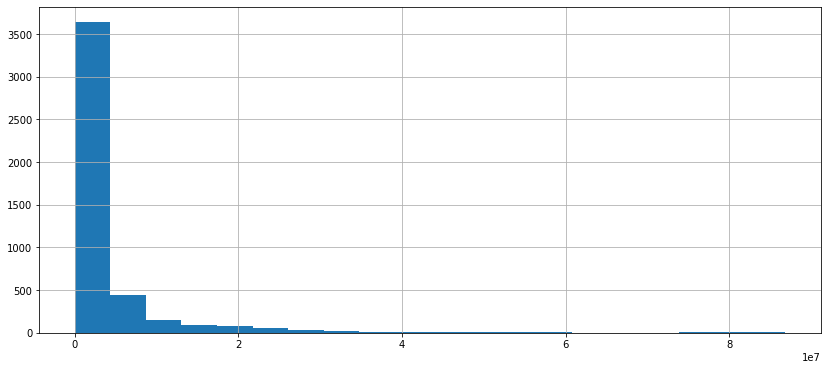

In [18]:
#plot histogram?
merged_country_df["TouristNumber"].hist(bins=20, figsize=[14,6])

In [19]:
#get all the values in the rows for Country Name
region_cols =merged_region_df['Country Name'].values

In [20]:
#seperate them according to specific words in the name
income_cols = [s for s in list(region_cols) if "income" in s]
dividend_cols =[s for s in list(region_cols) if "dividend" in s]
IDA_IBRD_cols =[s for s in list(region_cols) if ("IDA" in s or "IBRD" in s)]
not_classified_cols =[s for s in list(region_cols) if "not classified" in s]
organization_cols =[s for s in list(region_cols) if ("OECD members" in s or "Arab World" in s)]
small_states_cols =[s for s in list(region_cols) if "small states" in s]
other_cols =[s for s in list(region_cols) if ("Fragile and conflict affected situations" in s or "Heavily indebted poor countries (HIPC)" in s or "Least developed countries: UN classification" in s or "World" in s)]


In [21]:
#assign a classification to each list of names
def cond(x):
    if x in dividend_cols:
        return "Dividend" 
    elif x in IDA_IBRD_cols:
        return "IDA & IBRD" 
    elif x in income_cols:
        return "Income"
    elif x in not_classified_cols:
        return "Not Classified"
    elif x in organization_cols:
        return "Organization"
    elif x in small_states_cols:
        return "Small States"
    elif x in other_cols:
        return "Other"
    else:
        return "Group Region"
    return x

#assign classfication for every name in Country Name column
cat_col = [cond(x) for x in merged_region_df['Country Name']] 

#position we want to insert in df (3rd column)
idx = 2
#insert in existing df
merged_region_df.insert(loc=idx, column='Location Group', value=cat_col)
#show first 10 values to test it worked
merged_region_df.head(10)

,Country Name,Country Code,Location Group,Year,Population,Receipt,TouristNumber,StartupSteps,GDPpct,GDPgovt,GDPgovtpct,GDPcap
5,Arab World,ARB,Organization,1995,2.531073e+08,2.115522e+07,2.115522e+07,NaN,NaN,NaN,NaN,NaN
34,Central Europe and the Baltics,CEB,Group Region,1995,1.098642e+08,3.922400e+07,3.922400e+07,NaN,NaN,NaN,NaN,NaN
47,Caribbean small states,CSS,Small States,1995,6.281190e+06,4.485000e+06,4.485000e+06,NaN,NaN,NaN,NaN,NaN
59,East Asia & Pacific (excluding high income),EAP,Income,1995,1.717912e+09,4.357427e+07,4.357427e+07,NaN,NaN,NaN,NaN,NaN
60,Early-demographic dividend,EAR,Dividend,1995,2.250116e+09,7.002636e+07,7.002636e+07,NaN,NaN,NaN,NaN,NaN
61,East Asia & Pacific,EAS,Group Region,1995,1.942431e+09,7.763398e+07,7.763398e+07,NaN,NaN,NaN,NaN,NaN
62,Europe & Central Asia (excluding high income),ECA,Income,1995,3.912938e+08,3.227846e+07,3.227846e+07,NaN,NaN,NaN,NaN,NaN
63,Europe & Central Asia,ECS,Group Region,1995,8.562129e+08,2.955132e+08,2.955132e+08,NaN,NaN,NaN,NaN,NaN
66,Euro area,EMU,Group Region,1995,3.171814e+08,1.968470e+08,1.968470e+08,NaN,NaN,NaN,NaN,NaN
71,European Union,EUU,Group Region,1995,4.842224e+08,2.587999e+08,2.587999e+08,NaN,NaN,NaN,NaN,NaN
